# Jupyter Hub demo for NEUR1630 (Fall 2023)

This notebook contains demonstration of using Jupyter Hub resources for NEUR1630 (Fall 2023).

This has some data components, but mainly serve as a test to see if you can can get access to the resources and data.

<div class="alert alert-info">
    <strong>Potential resources:</strong>
    <li>CCV documentation: <a href="https://docs.ccv.brown.edu/jupyterhub">docs.ccv.brown.edu/jupyterhub</a></li>
    <li>Reach out in <em>Slack</em>: <code>#help-jupyter</code></li>
</div>



<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Please log into <a href="https://neur1630.jupyter.brown.edu">neur1630.jupyter.brown.edu</a> using your Brown GMail account</li>
    <li>Please run the whole notebook once you have it on Jupyter Hub</li>
    <li>If there's an issue (error/things seem stuck), please let us know</li>
    <li>After you run, check in the `figures` folder to confirm you can see 3 files</li>
    <li>Confirm the last 2 cells run, and compare with expected results</li>
</div>

Note: Don't worry about the specifics, this is just for testing. You can read the details later. 

## 1. Import and configuration

In [1]:
# Import some system stuff
import os
import time

# Import essential packages for data
import numpy as np # dealing with arrays
import pandas as pd # dealing with tables/dataframes

# Import essential packages for visualization
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
# Define some plotting configurations, make things pretty

# Fontsizes
rcParams['font.size'] = 12
rcParams['figure.titlesize'] = 18
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

# Line/Markers 
rcParams['axes.linewidth'] = 1.5
rcParams['lines.linewidth'] = 1.5
rcParams['lines.markersize'] = 20
rcParams['patch.linewidth'] = 1.5
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.width'] = 2

# Saving configuration
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = False
rcParams['savefig.facecolor'] = 'white'
rcParams['savefig.format'] = 'svg'
rcParams['savefig.pad_inches'] = 0.5
rcParams['savefig.bbox'] = 'tight'

In [3]:
# Define paths (these are assumed to be relative paths)
# it's good practice to define these paths up top
data_file_path = 'data/SpecimenMetadata.csv'
fig_path = 'figures'

## 2. Plot sinusoidal signal

In [4]:
# Make up vectors to plot stuff
x = np.arange(1000) # generate a vector from 0 to 999 (remember, python indexes from 0)
y = np.sin(x/89) # generate a sinusoidal vector
yn = y + 0.1 * np.random.randn(len(y)) # let's add some noise to `y` for fun

In [5]:
# Now let's plot
plt.figure(figsize=(15,5)) # create a figure with a custom size

# our sinusoidal, color "k" is short for black, let'ss also give it a label
plt.plot(x, y, color='k', linewidth=2, label='my sinusoidal tendency')

# plot our noisy sines as points, but sample every 10 points
# color param `c` can be a hex value
# make it a bit less opaque with `alpha=0.6`
plt.scatter(x[::10], yn[::10], s=100, c='#2ca25f', alpha=0.6, label='the noisy scatters')

# give the plot some labels
plt.xlabel('time [sec]')
plt.ylabel('amplitude of something [a.u.]')
plt.title('My big title')

# turn on legend
plt.legend()

# let's also save it
fig_name = 'my_sinusoidal_tendency.png' # let's save as a png
fig_file_path = os.path.join(fig_path, fig_name)
plt.savefig(fig_file_path)

# and also show it
plt.show()

<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Check there's a figure plotted above</li>
    <li>Check this file exists: <code>figures/my_sinusoidal_tendency.png</code></li>
</div>

## 3. Load & plot patchseq metadata

### 3.1. Explore data

This patchseq data is from Allen Brain, specifically <https://knowledge.brain-map.org/data/1HEYEW7GMUKWIQW37BO/summary>. The data are already downloaded (if you want to know how, see the `media` folder)

In [6]:
# Now let's load the patchseq metadata from mouse visual cortex
# this is a CSV file
df = pd.read_csv(data_file_path)

df

Project ID  Specimen ID     T type class   T type sub-class  \
0     1HEYEW7GMUKWIQW37BO    888317699  MGE interneuron    Sst interneuron   
1     1HEYEW7GMUKWIQW37BO    765853817  MGE interneuron  Pvalb interneuron   
2     1HEYEW7GMUKWIQW37BO    671876425  CGE interneuron  Lamp5 interneuron   
3     1HEYEW7GMUKWIQW37BO    906699622  MGE interneuron    Sst interneuron   
4     1HEYEW7GMUKWIQW37BO    778301240  MGE interneuron  Pvalb interneuron   
...                   ...          ...              ...                ...   
4279  1HEYEW7GMUKWIQW37BO    701163677  CGE interneuron  Lamp5 interneuron   
4280  1HEYEW7GMUKWIQW37BO    671529949  MGE interneuron  Pvalb interneuron   
4281  1HEYEW7GMUKWIQW37BO    766764831  CGE interneuron  Lamp5 interneuron   
4282  1HEYEW7GMUKWIQW37BO    673132928  MGE interneuron    Sst interneuron   
4283  1HEYEW7GMUKWIQW37BO    978205949  CGE interneuron  Lamp5 interneuron   

                     T type  T type assignment probability   MET type  \
0            Sst Tac1 Tacr3                           0.40        NaN   
1          Pvalb Reln Itm2a                           0.51        NaN   
2                Lamp5 Lsp1                           0.59        NaN   
3                  Sst Esm1                           1.00        NaN   
4              Pvalb Gabrg1                           1.00        NaN   
...                     ...                            ...        ...   
4279       Lamp5 Ntn1 Npy2r                           0.51        NaN   
4280     Pvalb Sema3e Kank4                           1.00        NaN   
4281             Lamp5 Lhx6                           1.00        NaN   
4282          Sst Myh8 Etv1                           0.49  Sst-MET-6   
4283  Lamp5 Fam19a1 Tmem182                           0.22        NaN   

     Cortical layer                                           Genotype  \
0                 5  Calb2-IRES-Cre/wt;Sst-IRES-FlpO/wt;Ai65(RCFL-t...   
1               2/3                 Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
2               2/3               Ndnf-IRES2-dgCre/wt;Ai14(RCL-tdT)/wt   
3                 5  Calb2-IRES-Cre/wt;Sst-IRES-FlpO/wt;Ai65(RCFL-t...   
4                6a   Sst-IRES-Cre/wt;Th-P2A-FlpO/wt;Ai65(RCFL-tdT)/wt   
...             ...                                                ...   
4279            2/3                Htr3a-Cre_NO152/wt;Ai14(RCL-tdT)/wt   
4280             6a                 Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
4281             6a                   Nos1-CreERT2/wt;Ai14(RCL-tdT)/wt   
4282             6a               Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
4283              4  Vipr2-IRES2-Cre/wt;Slc32a1-IRES2-FlpO/wt;Ai65(...   

      Electrophysiology available  ...  Basal Dendrite Soma Percentile Y  \
0                               1  ...                               NaN   
1                               1  ...                               NaN   
2                               1  ...                               NaN   
3                               1  ...                               NaN   
4                               1  ...                               NaN   
...                           ...  ...                               ...   
4279                            1  ...                               NaN   
4280                            1  ...                               NaN   
4281                            1  ...                               NaN   
4282                            1  ...                          0.599466   
4283                            1  ...                               NaN   

      Basal Dendrite Stem Exit Down  Basal Dendrite Stem Exit Side Less  \
0                               NaN                                 NaN   
1                               NaN                                 NaN   
2                               NaN                                 NaN   
3                               NaN                                 NaN   
4                       

In [7]:
# let's print out the columns
df.columns

Index(['Project ID', 'Specimen ID', 'T type class', 'T type sub-class',
       'T type', 'T type assignment probability', 'MET type', 'Cortical layer',
       'Genotype', 'Electrophysiology available', 'M/E/T available',
       'Morphology available', 'Transcriptomics available', 'Adaptation',
       'Avg ISI', 'Fast trough V (long square) (millivolts)',
       'Fast trough V (ramp) (millivolts)',
       'Fast trough V (short square) (millivolts)', 'F I curve slope',
       'Latency', 'Peak V (long square) (millivolts)',
       'Peak V (ramp) (millivolts)', 'Peak V (short square) (millivolts)',
       'sag', 'tau', 'Threshold I (long square) (picoamps)',
       'Threshold I (ramp) (picoamps)',
       'Threshold I (short square) (picoamps)',
       'Threshold V (long square) (millivolts)',
       'Threshold V (ramp) (millivolts)',
       'Threshold V (short square) (millivolts)',
       'Trough V (long square) (millivolts)', 'Trough V (ramp) (millivolts)',
       'Trough V (short square

That's a lot of variables! But we just want to play around so let's explore some metadata. 

In [8]:
# T=Transcriptomics
# we're going to see the unique neural sub-classes
df['T type sub-class'].unique()

array(['Sst interneuron', 'Pvalb interneuron', 'Lamp5 interneuron',
       'Vip interneuron', 'Sncg interneuron', 'Sst Chodl interneuron'],
      dtype=object)

In [9]:
# each row has certain info available
(
    df.filter(regex='.*available')
    .agg(lambda x: x.value_counts(), axis=0)
    .fillna(0).astype('int')
)

Electrophysiology available  M/E/T available  Morphology available  \
0                            0             3796                  3774   
1                         4284              488                   510   

   Transcriptomics available  
0                          0  
1                       4284

In [10]:
# let's focus on the cells that have all morphology(M), electrophys (E) and transcriptomics (T) info available
# sorting helps with plotting later on
df_select = (
    df.query('`M/E/T available` == 1')
    .sort_values(by='Cortical layer')
)

### 3.2. Plot electrophys/morphology characteristics of these subtypes

There are different ways (packages) you can plot. 

We're going to use `seaborn` to easily plot with data frames below.

There are many things you can plot, below are 2 examples that attempt to show how you can look at these 3 dimensions of a cell (M, E, T)

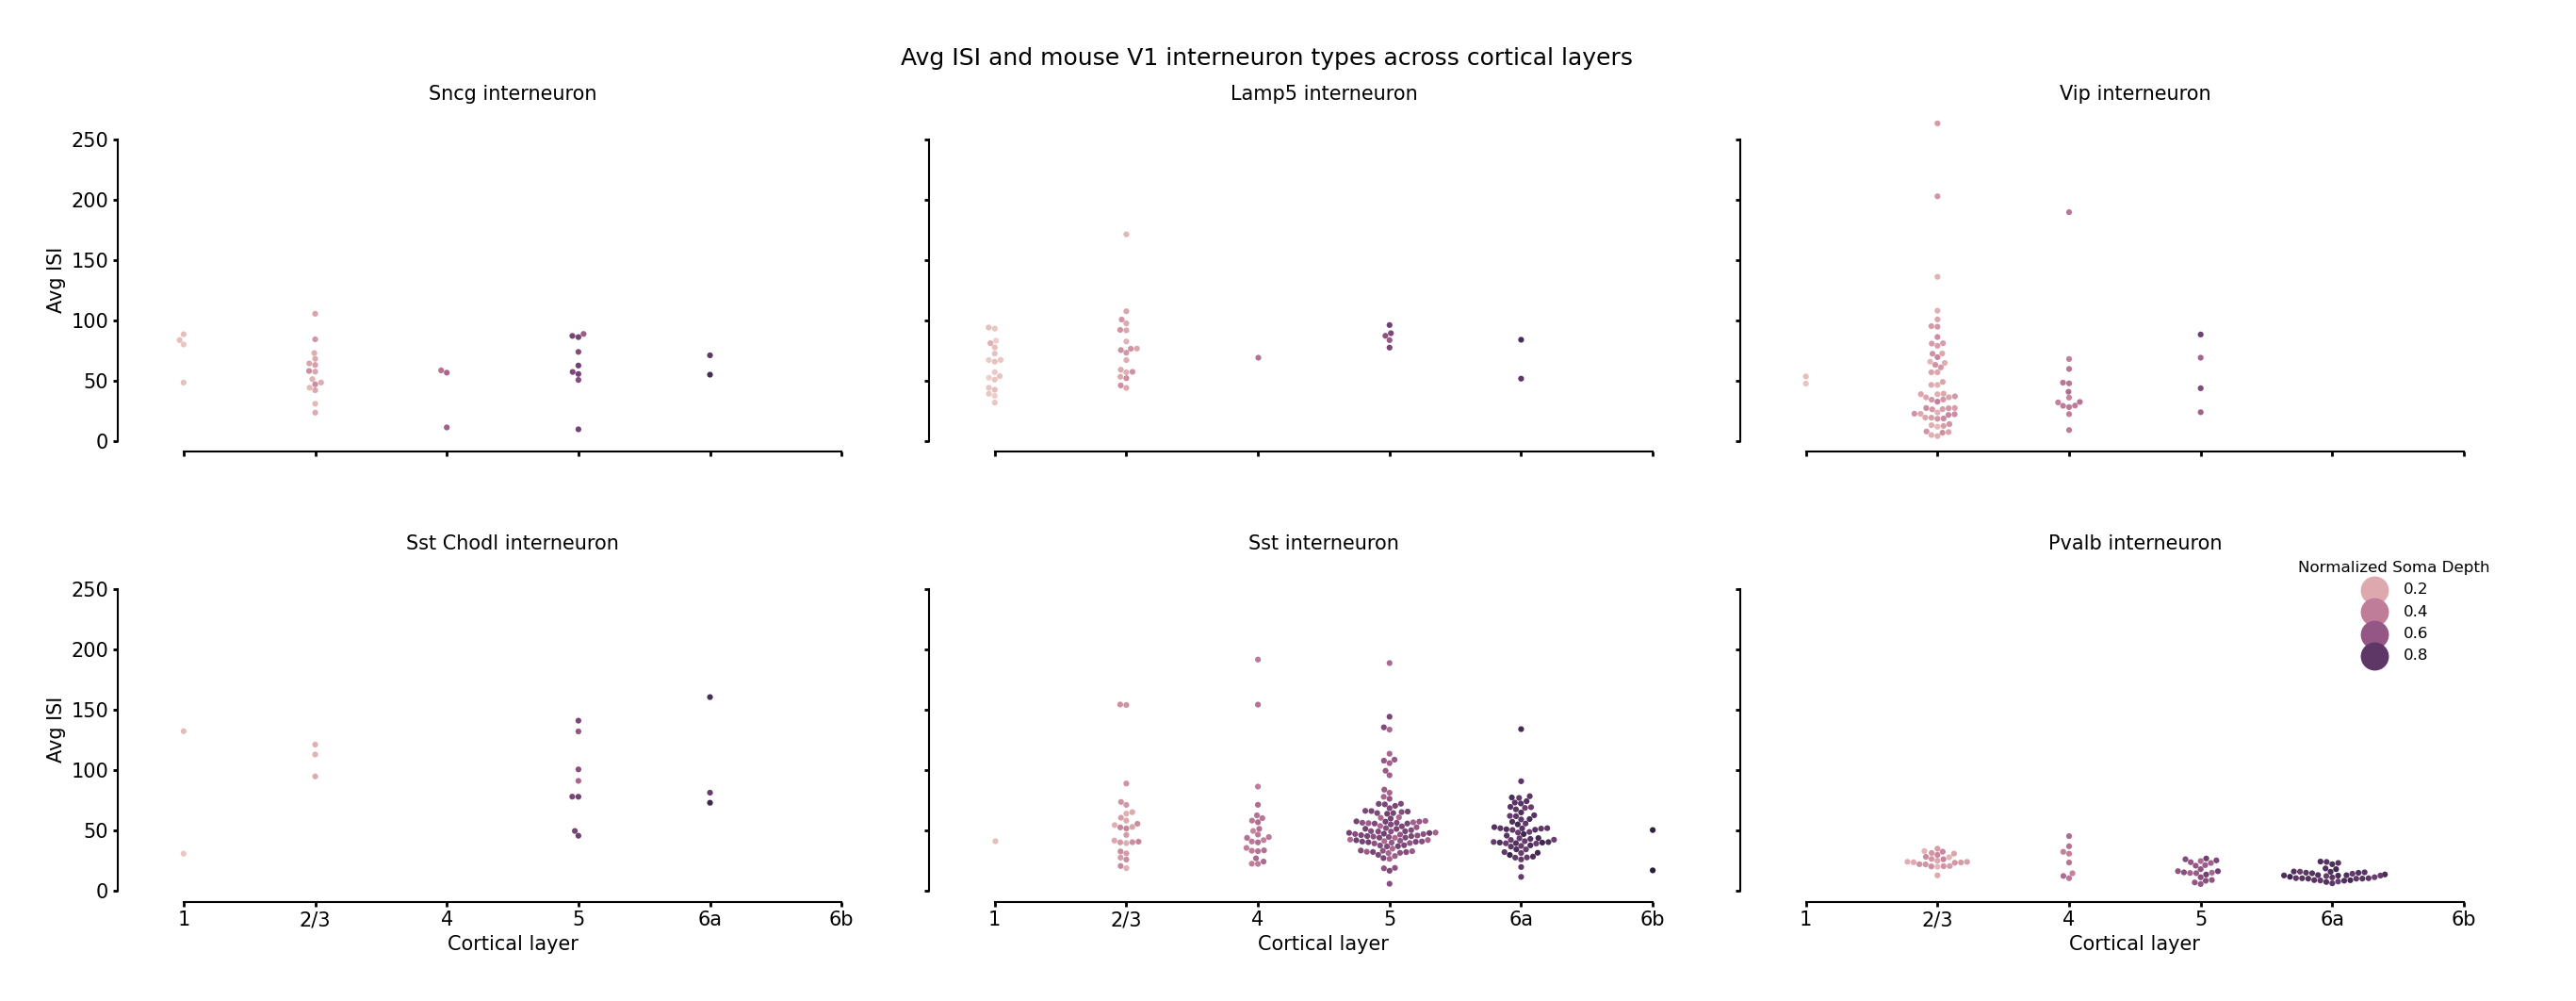

In [11]:
# Main plot
g = sns.catplot(
    df_select,
    x = 'Cortical layer',
    y = 'Avg ISI', # the E
    hue = 'Normalized Soma Depth', # the M
    col = 'T type sub-class', # the T
    col_wrap=3,
    s = 20,
    kind='swarm',
    aspect=1.8,
)

# Decorations + labeling
g.set_titles(template='{col_name}')
g.fig.suptitle('Avg ISI and mouse V1 interneuron types across cortical layers', x=0.45)  

sns.move_legend(
    g, loc= "upper right",  
    bbox_to_anchor=(0.9, 0.45), 
)

g.tight_layout(h_pad=5)
sns.despine(trim=True)

# Save figure as a PDF
fig_name = 'mouse-vis-inh_avgisi-layer-somadepth.pdf'
fig_file_path = os.path.join(fig_path, fig_name)
plt.savefig(fig_file_path)

plt.show()


<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Check there's a figure plotted above</li>
    <li>Check this file exists: <code>figures/mouse-vis-inh_avgisi-layer-somadepth.pdf</code></li>
</div>

Notice how `Normalized Soma Depth` and `Cortical layer` are very related! 

This is just a sanity check, as these two variables should be almost equilalent.

Look up what `Avg ISI` is for this data set (hint: ISI is short for inter-spike interval). 

What do you think this means for these different interneuron subtypes? 

Think of potential questions to dig further when you have the sequencing data or the actual electrophysiolgical recordings.

Below is another plot.

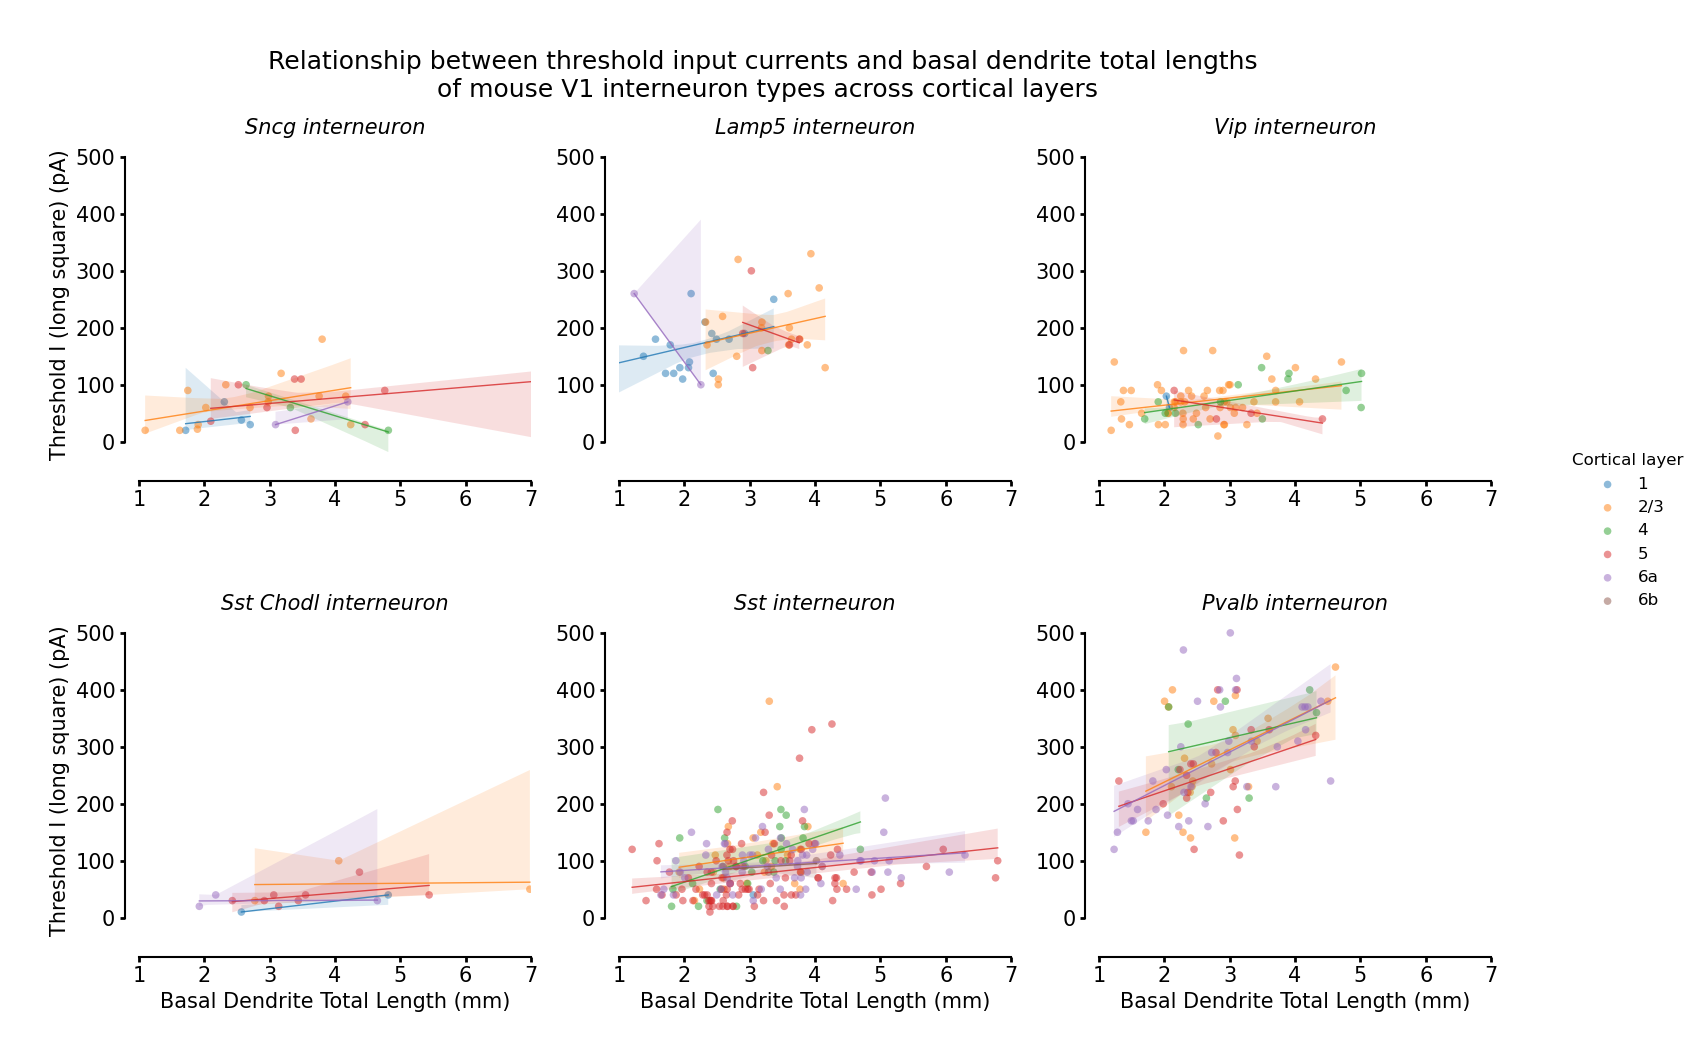

In [12]:
# Main plot
g = sns.lmplot(
    df_select,
    x = 'Basal Dendrite Total Length (millimeters)', # the M 
    y = 'Threshold I (long square) (picoamps)', # the E
    hue = 'Cortical layer',
    col = 'T type sub-class', # the T
    col_wrap=3,
    n_boot=10,
    scatter_kws=dict(s = 30, alpha=0.5, edgecolors='none'),
    line_kws=dict(linewidth=1, alpha=0.8),
    # facet_kws=dict(sharex=True, sharey=False) # uncomment to scale x/y lim together/separately across panels
)

# Labels and decorations
g.set_titles(template='{col_name}', fontstyle='italic')
g.set_axis_labels(
    x_var = 'Basal Dendrite Total Length (mm)',
    y_var = 'Threshold I (long square) (pA)'
)
g.fig.suptitle('Relationship between threshold input currents and basal dendrite total lengths\n of mouse V1 interneuron types across cortical layers', x=0.45)  
plt.xlim([1,7])
sns.despine(trim=True, offset=10)
g.tight_layout(h_pad=5)

# Save figure as SVG
# why SVG/PDF? you can import these into your favorite vector graphics editors like Inkscape, Adobe
# and these are usually higher quality than rasterized plots (PNG), and sometimes smaller in sizes
fig_name = 'mouse-vis-inh_thresIlong-bdendlen-layer.svg'
fig_file_path = os.path.join(fig_path, fig_name)
plt.savefig(fig_file_path)

plt.show()


<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Check there's a figure plotted above</li>
    <li>Check this file exists: <code>figures/mouse-vis-inh_thresIlong-bdendlen-layer.svg</code></li>
</div>

## 4. Test access to `shared` data

<div class="alert alert-warning">
    This is very important for the later notebooks in the course.
    <br>
    Many of the data are in <code>shared/data</code> folder, some with special formats.
    <br>
    We are testing to see whether you can access and read some of these data.
    <br>
    Let us know if you cannot open them, the cell just never prints out anything.
    <br>
    Expect some weird things happening here.
</div>

Note: You're not going to be using these different formats immediately, so don't worry about the specifics, we just want to test in this notebook

In [13]:
# list files
!ls /home/jovyan/shared/data

braincelldata  daste-2023  README.md  zeppilli-etal-2023


This cell below (setting `HDF5_USE_FILE_LOCKING`) is currently very important for reading HDF5 files that reside in the `shared` folder

For example, if your file ends with `.h5`, `.h5ad`, `.nwb`, **and** such file is somewhere in the `shared` folder, you should set it

In [14]:
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


### 4.1. Test reading shared h5ad

In [15]:
%%time

import anndata as ad

data_path = '/home/jovyan/shared/data/zeppilli-etal-2023/rna_from_multiome_adult_mouse_lab_neurons_outputGEX4_paleo_peripaleo_neo_2022-10-20_11h13.h5ad'
adata = ad.read_h5ad(data_path)

print(adata)

AnnData object with n_obs × n_vars = 5553 × 23802
    obs: 'mouse_id', 'gender', 'replicate', 'cortical_area', 'experiment', 'mouse_strain', 'mouse_strain_label', 'genome_species', 'cortical_area_mouse_strain', 'frac_mito', 'n_counts', 'n_genes', 'size_factors', 'leiden', 'leiden_100_0.6_noharmony', 'leiden_100_1.2_harmony', 'n_counts_scaled', 'doublet_score', 'predicted_doublet', 'pred_doublet_cat', 'S_score', 'G2M_score', 'phase', 'coarse_supertype', 'cortical_area_coarse_supertype', 'neighboring_tissue', 'leiden_100_0.8_noharmony', 'leiden_50_2.5_harmony', 'leiden_50_2.1_noharmony', 'leiden_50_3.7_harmony', 'old_supertype', 'supertype', 'cortical_area_supertype', 'cortical_area_layer'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_scanpy', 'subset_highly_variable_scanpy'
    uns: 'coarse_supertype_colors', 'coarse_supertype_sizes', 'cortical_area_colors', 'cortical_area_l

<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Check that the cell above <strong>finishes</strong> (expected time ~8-10 seconds)</li>
    <li>Check that the output matches with the below text (just briefly skim it, disregard the timing report)</li>
</div>


```
AnnData object with n_obs × n_vars = 5553 × 23802
    obs: 'mouse_id', 'gender', 'replicate', 'cortical_area', 'experiment', 'mouse_strain', 'mouse_strain_label', 'genome_species', 'cortical_area_mouse_strain', 'frac_mito', 'n_counts', 'n_genes', 'size_factors', 'leiden', 'leiden_100_0.6_noharmony', 'leiden_100_1.2_harmony', 'n_counts_scaled', 'doublet_score', 'predicted_doublet', 'pred_doublet_cat', 'S_score', 'G2M_score', 'phase', 'coarse_supertype', 'cortical_area_coarse_supertype', 'neighboring_tissue', 'leiden_100_0.8_noharmony', 'leiden_50_2.5_harmony', 'leiden_50_2.1_noharmony', 'leiden_50_3.7_harmony', 'old_supertype', 'supertype', 'cortical_area_supertype', 'cortical_area_layer'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_scanpy', 'subset_highly_variable_scanpy'
    uns: 'coarse_supertype_colors', 'coarse_supertype_sizes', 'cortical_area_colors', 'cortical_area_layer_colors', 'dendrogram_leiden', 'dendrogram_leiden_100_1.2_harmony', 'hvg', 'leiden', 'leiden_100_1.2_harmony_colors', 'leiden_100_1.2_harmony_sizes', 'leiden_50_2.5_harmony_colors', 'leiden_50_3.7_harmony_colors', 'leiden_50_3.7_harmony_sizes', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'old_supertype_colors', 'paga', 'pca', 'phase_colors', 'pred_doublet_cat_colors', 'replicate_colors', 'supertype_colors', 'supertype_sizes', 'umap', 'zeppilli_qc'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_harmony', 'X_umap_noharmony', 'X_umap_paga'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'
```

### 4.2. Another test of reading shared h5ad with backed

In [16]:
%%time

import anndata as ad

data_path = '/home/jovyan/shared/data/braincelldata/single-nuclei/Macosko_Mouse_Atlas_Single_Nuclei.Use_Backed.h5ad'
adata = ad.read_h5ad(data_path, backed='r')

print(adata)

AnnData object with n_obs × n_vars = 4407296 × 21899 backed at '/home/jovyan/shared/data/braincelldata/single-nuclei/Macosko_Mouse_Atlas_Single_Nuclei.Use_Backed.h5ad'
    obs: 'ClusterKey', 'ClusterNm', 'derived_cell_libs'
    var: 'gene_name'
CPU times: user 5.81 s, sys: 814 ms, total: 6.62 s
Wall time: 6.62 s


<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Check that the cell above <strong>finishes</strong> (expected time ~8-10 seconds)</li>
    <li>Check that the output matches with the below text (just briefly skim it, disregard the timing report)</li>
</div>


```
AnnData object with n_obs × n_vars = 4407296 × 21899 backed at '/home/jovyan/shared/data/braincelldata/single-nuclei/Macosko_Mouse_Atlas_Single_Nuclei.Use_Backed.h5ad'
    obs: 'ClusterKey', 'ClusterNm', 'derived_cell_libs'
    var: 'gene_name'
```


### 4.3. Test reading shared nwb

In [17]:
%%time

from pynwb import NWBHDF5IO

data_path = '/home/jovyan/shared/data/daste-2023/sub-163/sub-163_ses-20200212T160655_ophys.nwb'
# read using NWB
with NWBHDF5IO(data_path, 'r') as io:
    nwbfile = io.read()
    print(nwbfile.processing['ophys'])

ophys pynwb.base.ProcessingModule at 0x134464457091824
Fields:
  data_interfaces: {
    Backgrounds_0 <class 'pynwb.base.Images'>,
    Backgrounds_1 <class 'pynwb.base.Images'>,
    Backgrounds_2 <class 'pynwb.base.Images'>,
    Deconvolved <class 'pynwb.ophys.Fluorescence'>,
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    Neuropil <class 'pynwb.ophys.Fluorescence'>
  }
  description: optical physiology processed data from suite2p

CPU times: user 1.47 s, sys: 118 ms, total: 1.58 s
Wall time: 1.58 s


<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Check that the cell above <strong>finishes</strong> (expected time, 1-3 seconds)</li>
    <li>Check that the output matches with the below text (just briefly skim it, disregard the timing report)</li>
</div>

```
ophys pynwb.base.ProcessingModule at 0x132132746877392
Fields:
  data_interfaces: {
    Backgrounds_0 <class 'pynwb.base.Images'>,
    Backgrounds_1 <class 'pynwb.base.Images'>,
    Backgrounds_2 <class 'pynwb.base.Images'>,
    Deconvolved <class 'pynwb.ophys.Fluorescence'>,
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    Neuropil <class 'pynwb.ophys.Fluorescence'>
  }
  description: optical physiology processed data from suite2p
```

### 4.4. Test reading a streamed nwb

In [18]:
%%time

# source: https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html
# with slight modification

import fsspec
import pynwb
import h5py
from fsspec.implementations.cached import CachingFileSystem
from dandi.dandiapi import DandiAPIClient


dandiset_id = '000006'  # ephys dataset from the Svoboda Lab
filepath = 'sub-anm372795/sub-anm372795_ses-20170718.nwb'  # 450 kB file
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)
    
# first, create a virtual filesystem based on the http protocol
fs = fsspec.filesystem("http")

# create a cache to save downloaded data to disk (optional)
fs = CachingFileSystem(
    fs=fs,
)

# next, open the file
with (
    fs.open(s3_url, "rb") as f,
    h5py.File(f) as file,
    pynwb.NWBHDF5IO(file=file, load_namespaces=True) as io
):
    nwbfile = io.read()
    print(nwbfile.acquisition)

A newer version (0.56.2) of dandi/dandi-cli is available. You are using 0.56.0


{'lick_times': lick_times pynwb.behavior.BehavioralEvents at 0x134464435802320
Fields:
  time_series: {
    lick_left_times <class 'pynwb.base.TimeSeries'>,
    lick_right_times <class 'pynwb.base.TimeSeries'>
  }
}
CPU times: user 670 ms, sys: 77.7 ms, total: 748 ms
Wall time: 2.56 s


/opt/conda/envs/neur1630/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.0.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


<div class="alert alert-success">
    <strong>Tasks</strong>
    <li>Check that the cell above <strong>finishes</strong> (expected time, 1-3 seconds)</li>
    <li>Check that the output matches with the below text (just briefly skim it, disregard the timing report)</li>
    <li>Ignore the warnings</li>
</div>

```
{'lick_times': lick_times pynwb.behavior.BehavioralEvents at 0x132136494299984
Fields:
  time_series: {
    lick_left_times <class 'pynwb.base.TimeSeries'>,
    lick_right_times <class 'pynwb.base.TimeSeries'>
  }
}
```